In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [424]:
life_data = pd.read_csv('Life Expectancy Data.csv')

In [425]:
life_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.00,2928.00,2928.00,2938.00,2744.00,2938.00,2385.00,2938.00,2904.00,2938.00,2919.00,2712.00,2919.00,2938.00,2490.00,2286.00,2904.00,2904.00,2771.00,2775.00
mean,2007.52,69.22,164.80,30.30,4.60,738.25,80.94,2419.59,38.32,42.04,82.55,5.94,82.32,1.74,7483.16,12753375.12,4.84,4.87,0.63,11.99
std,4.61,9.52,124.29,117.93,4.05,1987.91,25.07,11467.27,20.04,160.45,23.43,2.50,23.72,5.08,14270.17,61012096.51,4.42,4.51,0.21,3.36
min,2000.00,36.30,1.00,0.00,0.01,0.00,1.00,0.00,1.00,0.00,3.00,0.37,2.00,0.10,1.68,34.00,0.10,0.10,0.00,0.00
25%,2004.00,63.10,74.00,0.00,0.88,4.69,77.00,0.00,19.30,0.00,78.00,4.26,78.00,0.10,463.94,195793.25,1.60,1.50,0.49,10.10
50%,2008.00,72.10,144.00,3.00,3.75,64.91,92.00,17.00,43.50,4.00,93.00,5.75,93.00,0.10,1766.95,1386542.00,3.30,3.30,0.68,12.30
75%,2012.00,75.70,228.00,22.00,7.70,441.53,97.00,360.25,56.20,28.00,97.00,7.49,97.00,0.80,5910.81,7420359.00,7.20,7.20,0.78,14.30
max,2015.00,89.00,723.00,1800.00,17.87,19479.91,99.00,212183.00,87.30,2500.00,99.00,17.60,99.00,50.60,119172.74,1293859294.00,27.70,28.60,0.95,20.70


In [426]:
strong  = (life_data.corr() > 0.7).values

In [427]:
neg_strong = (life_data.corr() < - 0.7).values

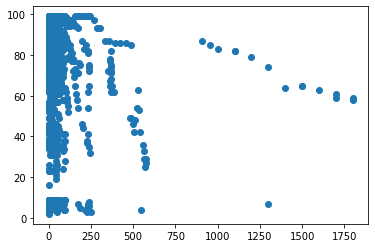

In [428]:
plt.scatter(life_data.iloc[:, 5],life_data.iloc[:, 14])

In [429]:
for n in range(strong.shape[0]):
    for x in range(len(strong[n,:])):
        if x!=n:
            if strong[n, x] == True:
                print(n, x)

1 18
1 19
3 9
5 14
9 3
14 5
16 17
17 16
18 1
18 19
19 1
19 18


In [430]:
life_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.00,263.00,62,0.01,71.28,65.00,1154,...,6.00,8.16,65.00,0.10,584.26,33736494.00,17.20,17.30,0.48,10.10
1,Afghanistan,2014,Developing,59.90,271.00,64,0.01,73.52,62.00,492,...,58.00,8.18,62.00,0.10,612.70,327582.00,17.50,17.50,0.48,10.00
2,Afghanistan,2013,Developing,59.90,268.00,66,0.01,73.22,64.00,430,...,62.00,8.13,64.00,0.10,631.74,31731688.00,17.70,17.70,0.47,9.90
3,Afghanistan,2012,Developing,59.50,272.00,69,0.01,78.18,67.00,2787,...,67.00,8.52,67.00,0.10,669.96,3696958.00,17.90,18.00,0.46,9.80
4,Afghanistan,2011,Developing,59.20,275.00,71,0.01,7.10,68.00,3013,...,68.00,7.87,68.00,0.10,63.54,2978599.00,18.20,18.20,0.45,9.50


In [431]:
life_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [432]:
country_codes = {x:y for x,y in enumerate(life_data.Country.unique())}

In [433]:
dummy_countries = pd.get_dummies(life_data.Country)

In [434]:
for d in range(dummy_countries.shape[1]):
    life_data.insert(d, country_codes[d], dummy_countries.iloc[:, d])

In [435]:
np.where(life_data.dtypes == 'object')

(array([193, 195], dtype=int64),)

In [436]:
ok = {y:x for x, y in enumerate(life_data.Status.unique())}

In [437]:
ok

{'Developing': 0, 'Developed': 1}

In [438]:
def encode(n):
    return ok[n]

In [439]:
life_data.Status  = life_data.Status.apply(encode)

In [440]:
life_data.head()

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1,0,0,0,0,0,0,0,0,0,...,6.00,8.16,65.00,0.10,584.26,33736494.00,17.20,17.30,0.48,10.10
1,1,0,0,0,0,0,0,0,0,0,...,58.00,8.18,62.00,0.10,612.70,327582.00,17.50,17.50,0.48,10.00
2,1,0,0,0,0,0,0,0,0,0,...,62.00,8.13,64.00,0.10,631.74,31731688.00,17.70,17.70,0.47,9.90
3,1,0,0,0,0,0,0,0,0,0,...,67.00,8.52,67.00,0.10,669.96,3696958.00,17.90,18.00,0.46,9.80
4,1,0,0,0,0,0,0,0,0,0,...,68.00,7.87,68.00,0.10,63.54,2978599.00,18.20,18.20,0.45,9.50


In [441]:
life_data.columns

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object', length=215)

In [442]:
life_data[life_data["Year"] == 2015]["infant deaths"].sum()

4356

In [443]:
year_to_deaths = []
for x in life_data["Year"].unique():
    year_to_deaths.append(life_data[life_data["Year"] == x]["infant deaths"].sum())

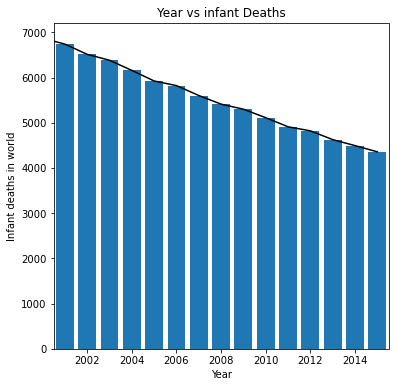

In [444]:
plt.figure(figsize=(6,6))
plt.bar(life_data.Year.unique(), year_to_deaths)
plt.plot(life_data.Year.unique(), year_to_deaths,'-k');
plt.xlim(2000.5, 2015.5)
plt.xlabel('Year')
plt.ylabel('Infant deaths in world')
plt.title('Year vs infant Deaths');

In [445]:
gdp_growth = []
for x in life_data["Year"].unique():
    gdp_growth.append(life_data[life_data["Year"] == x]["GDP"].mean())

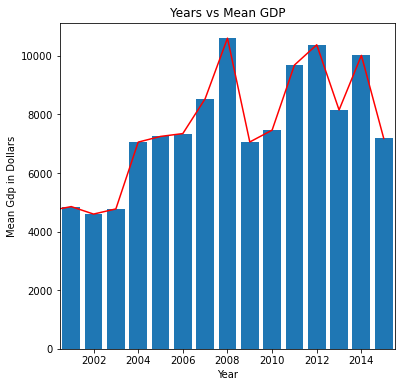

In [446]:
plt.figure(figsize=(6,6))
plt.bar(life_data.Year.unique(), gdp_growth)
plt.plot(life_data.Year.unique(), gdp_growth,'-r')
plt.xlim(2000.5, 2015.5);
plt.xlabel('Year')
plt.ylabel('Mean Gdp in Dollars')
plt.title('Years vs Mean GDP');

In [447]:
life_exp = []
for x in life_data["Year"].unique():
    life_exp.append(life_data[life_data["Year"] == x]["Life expectancy "].mean())

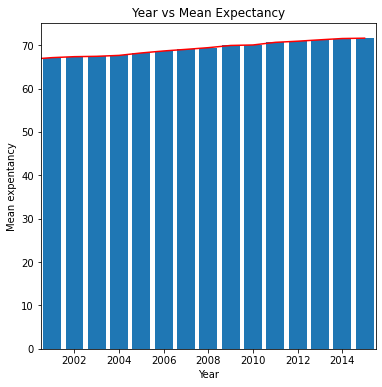

In [448]:
plt.figure(figsize=(6,6))
plt.bar(life_data.Year.unique(), life_exp)
plt.plot(life_data.Year.unique(), life_exp,'-r')
plt.xlim(2000.5, 2015.5);
plt.xlabel('Year')
plt.ylabel("Mean expentancy")
plt.title("Year vs Mean Expectancy");

In [449]:
per_exp = []
for x in life_data["Year"].unique():
    per_exp.append(life_data[life_data["Year"] == x]["percentage expenditure"].mean())

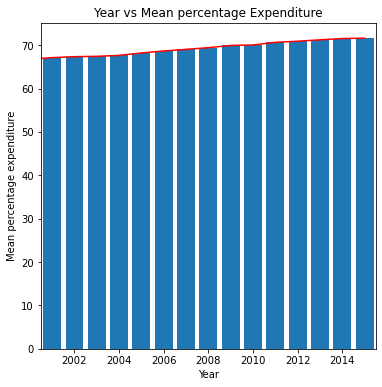

In [450]:
plt.figure(figsize=(6,6))
plt.bar(life_data.Year.unique(), life_exp)
plt.plot(life_data.Year.unique(), life_exp,'-r')
plt.xlim(2000.5, 2015.5);
plt.xlabel('Year')
plt.ylabel("Mean percentage expenditure")
plt.title("Year vs Mean percentage Expenditure");

In [451]:
year_to_deaths = []
for x in life_data["Year"].unique():
    year_to_deaths.append(life_data.query('Year =={} and Status == 0'.format(x))["infant deaths"].sum())

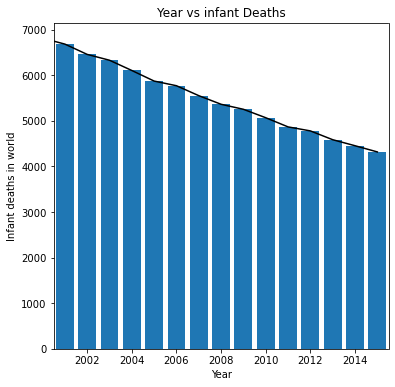

In [452]:
plt.figure(figsize=(6,6))
plt.bar(life_data.Year.unique(), year_to_deaths)
plt.plot(life_data.Year.unique(), year_to_deaths,'-k');
plt.xlim(2000.5, 2015.5)
plt.xlabel('Year')
plt.ylabel('Infant deaths in world')
plt.title('Year vs infant Deaths');

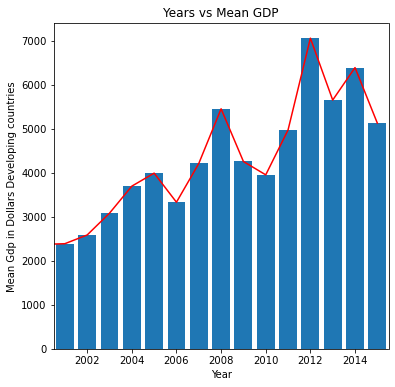

In [453]:
gdp_growth = []
for x in life_data["Year"].unique():
    gdp_growth.append(life_data.query('Year =={} and Status == 0'.format(x))["GDP"].mean())

plt.figure(figsize=(6,6))
plt.bar(life_data.Year.unique(), gdp_growth)
plt.plot(life_data.Year.unique(), gdp_growth,'-r')
plt.xlim(2000.5, 2015.5);
plt.xlabel('Year')
plt.ylabel('Mean Gdp in Dollars Developing countries')
plt.title('Years vs Mean GDP');

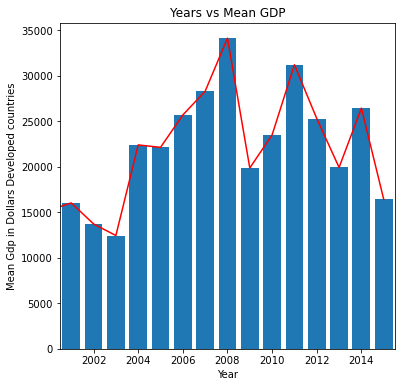

In [454]:
gdp_growth = []
for x in life_data["Year"].unique():
    gdp_growth.append(life_data.query('Year =={} and Status == 1'.format(x))["GDP"].mean())

plt.figure(figsize=(6,6))
plt.bar(life_data.Year.unique(), gdp_growth)
plt.plot(life_data.Year.unique(), gdp_growth,'-r')
plt.xlim(2000.5, 2015.5);
plt.xlabel('Year')
plt.ylabel('Mean Gdp in Dollars Developed countries')
plt.title('Years vs Mean GDP');

In [455]:
life_data = life_data.drop(columns="Country")

In [456]:
means = np.unique(np.where(life_data.isnull() == True)[1])
for x in filler.index:
    life_data[x] = life_data[x].fillna(filler[x])

In [457]:
means

array([195, 196, 198, 200, 202, 204, 205, 206, 208, 209, 210, 211, 212,
       213], dtype=int64)

In [458]:
y = life_data.iloc[:,196]

In [459]:
x = life_data.iloc[:, :196].join(life_data.iloc[:, 197:])

In [460]:
means = np.unique(np.where(life_data.isnull() == True)[1])

In [461]:
means

array([], dtype=int64)

In [462]:
from sklearn.model_selection import train_test_split

In [463]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.09, random_state=42)

In [464]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [465]:
svr = SVR(n_jobs=-1)

In [466]:
ada = AdaBoostRegressor(base_estimator=svr,n_estimators=100,learning_rate=0.01)

In [467]:
rfr = RandomForestRegressor(n_estimators=200, n_jobs=-1)

In [468]:
from sklearn.impute import KNNImputer,SimpleImputer

In [469]:
knn = KNNImputer(n_neighbors=3, missing_values=[np.nan, np.float64(np.nan)])

In [470]:
pd.options.display.float_format = '{:.2f}'.format

In [471]:
filler = life_data.mean(axis=0).iloc[means]

In [472]:
filler.index

Index([], dtype='object')

In [473]:
means = np.unique(np.where(x_train.isnull() == True)[1])

In [474]:
x_train["Life expectancy "].isnull()

676     False
1208    False
748     False
2302    False
2383    False
        ...  
1638    False
1095    False
1130    False
1294    False
860     False
Name: Life expectancy , Length: 2673, dtype: bool

In [475]:
means

array([], dtype=int64)

In [476]:
rfr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1)

In [477]:
ada.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=SVR(), learning_rate=0.01, n_estimators=100)

In [478]:
x.columns

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object', length=213)

In [479]:
knn.fit_transform(x_train)

array([[[ 0.   ,  0.   ,  0.   , ...,  1.   ,  0.85 , 13.8  ]],

       [[ 0.   ,  0.   ,  0.   , ...,  1.6  ,  0.645, 11.7  ]],

       [[ 0.   ,  0.   ,  0.   , ...,  1.   ,  0.893, 16.5  ]],

       ...,

       [[ 0.   ,  0.   ,  0.   , ...,  4.2  ,  0.458,  8.4  ]],

       [[ 0.   ,  0.   ,  0.   , ...,  0.5  ,  0.841, 15.4  ]],

       [[ 0.   ,  0.   ,  0.   , ...,  9.5  ,  0.   ,  5.4  ]]])

In [480]:
from sklearn.metrics import mean_squared_error as mse

In [481]:
mse(y_test, rfr.predict(x_test))**(0.5)

74.30238756215388

In [482]:
rfr.predict(x_test)

array([122.365     , 115.93      , 125.005     ,  73.51      ,
       387.21      , 325.68      , 108.43898224, 112.355     ,
        64.89      , 419.855     , 240.425     , 235.295     ,
       251.035     ,  73.465     , 177.22889344, 238.655     ,
       234.455     ,  73.535     , 167.945     ,  74.38      ,
        54.        ,  55.38      , 148.47      ,  91.675     ,
       162.39      , 165.535     , 344.715     , 221.92      ,
        56.22      , 114.625     , 167.925     , 113.485     ,
        36.37      , 155.245     ,  82.65      , 225.065     ,
       276.9       , 138.08898224, 222.87      , 111.945     ,
       264.865     , 201.02      ,  78.765     ,  55.305     ,
       110.06      , 466.78      ,  67.145     ,  77.22      ,
       257.99      , 124.01898224, 287.485     , 165.775     ,
        70.03      ,  77.105     ,  89.765     , 284.825     ,
       152.84      ,  77.535     , 179.05      ,  97.07      ,
        64.565     , 294.595     ,  77.41      , 129.60

In [483]:
from sklearn.metrics import explained_variance_score, r2_score

In [484]:
print(explained_variance_score(y_test, rfr.predict(x_test)))
print(explained_variance_score(y_test, ada.predict(x_test)))

0.6321323583628748
-0.0026180919982512485


In [485]:
print(r2_score(y_test, rfr.predict(x_test)))
print(r2_score(y_test, rfr.predict(x_test)))

0.6321101108423076
0.6321101108423076
